In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_csv("Sample - Superstore.csv", encoding="latin1")


In [4]:
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.shape


(9994, 21)

In [6]:
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [7]:
df.duplicated().sum()


np.int64(0)

In [8]:
df = df.drop_duplicates()


In [9]:
df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [10]:
df = df.dropna(subset=['Order Date', 'Ship Date'])


In [11]:
df['Discount'] = df['Discount'].fillna(0)


In [12]:
df = df.dropna(subset=['Category', 'Region'])


In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [14]:
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Month_Name'] = df['Order Date'].dt.month_name()
df['Order_Quarter'] = df['Order Date'].dt.to_period('Q')


In [15]:
df.dtypes


Row ID                       int64
Order ID                    object
Order Date          datetime64[ns]
Ship Date           datetime64[ns]
Ship Mode                   object
Customer ID                 object
Customer Name               object
Segment                     object
Country                     object
City                        object
State                       object
Postal Code                  int64
Region                      object
Product ID                  object
Category                    object
Sub-Category                object
Product Name                object
Sales                      float64
Quantity                     int64
Discount                   float64
Profit                     float64
Order_Year                   int32
Order_Month                  int32
Order_Month_Name            object
Order_Quarter        period[Q-DEC]
dtype: object

In [16]:
df[df['Profit'] < 0].shape


(1871, 25)

In [17]:
df['Is_Loss_Order'] = np.where(df['Profit'] < 0, 1, 0)


In [18]:
df.groupby('Category')['Is_Loss_Order'].mean().sort_values(ascending=False)


Category
Furniture          0.336634
Office Supplies    0.147030
Technology         0.146724
Name: Is_Loss_Order, dtype: float64

In [19]:
df.describe()


,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Order_Year,Order_Month,Is_Loss_Order
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896,2015.722233,7.809686,0.187212
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,2014.000000,1.000000,0.000000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,2015.000000,5.000000,0.000000
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500,2016.000000,9.000000,0.000000
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,2017.000000,11.000000,0.000000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,2017.000000,12.000000,1.000000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108,1.123555,3.284654,0.390101


In [20]:
df.to_csv("cleaned_sales.csv", index=False)


In [21]:
df['Revenue'] = df['Sales']


In [22]:
df['Profit_Margin'] = df['Profit'] / df['Revenue']


In [23]:
df.replace([np.inf, -np.inf], 0, inplace=True)


In [24]:
df['Revenue_per_Unit'] = df['Revenue'] / df['Quantity']


In [25]:
df[['Revenue', 'Quantity', 'Revenue_per_Unit']].head()


,Revenue,Quantity,Revenue_per_Unit
0,261.9600,2,130.9800
1,731.9400,3,243.9800
2,14.6200,2,7.3100
3,957.5775,5,191.5155
4,22.3680,2,11.1840


In [26]:
df['Shipping_Days'] = (df['Ship Date'] - df['Order Date']).dt.days


In [27]:
customer_revenue = (
    df.groupby('Customer ID')['Revenue']
    .sum()
    .reset_index()
    .rename(columns={'Revenue': 'Customer_Lifetime_Revenue'})
)

df = df.merge(customer_revenue, on='Customer ID', how='left')


In [28]:
order_frequency = (
    df.groupby('Customer ID')['Order ID']
    .nunique()
    .reset_index()
    .rename(columns={'Order ID': 'Order_Frequency'})
)

df = df.merge(order_frequency, on='Customer ID', how='left')


In [29]:
df['High_Value_Order'] = np.where(df['Revenue'] > df['Revenue'].quantile(0.75), 1, 0)


In [30]:
df.head()
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order_Year',
       'Order_Month', 'Order_Month_Name', 'Order_Quarter', 'Is_Loss_Order',
       'Revenue', 'Profit_Margin', 'Revenue_per_Unit', 'Shipping_Days',
       'Customer_Lifetime_Revenue', 'Order_Frequency', 'High_Value_Order'],
      dtype='object')

In [31]:
df.to_csv("featured_sales.csv", index=False)


In [32]:
total_revenue = df['Revenue'].sum()
total_profit = df['Profit'].sum()
profit_margin = total_profit / total_revenue

total_revenue, total_profit, profit_margin


(np.float64(2297200.8603),
 np.float64(286397.0217),
 np.float64(0.12467217240315605))

In [33]:
monthly_revenue = (
    df.groupby(['Order_Year', 'Order_Month'])['Revenue']
    .sum()
    .reset_index()
)

monthly_revenue['Date'] = pd.to_datetime(
    monthly_revenue['Order_Year'].astype(str) + '-' +
    monthly_revenue['Order_Month'].astype(str)
)


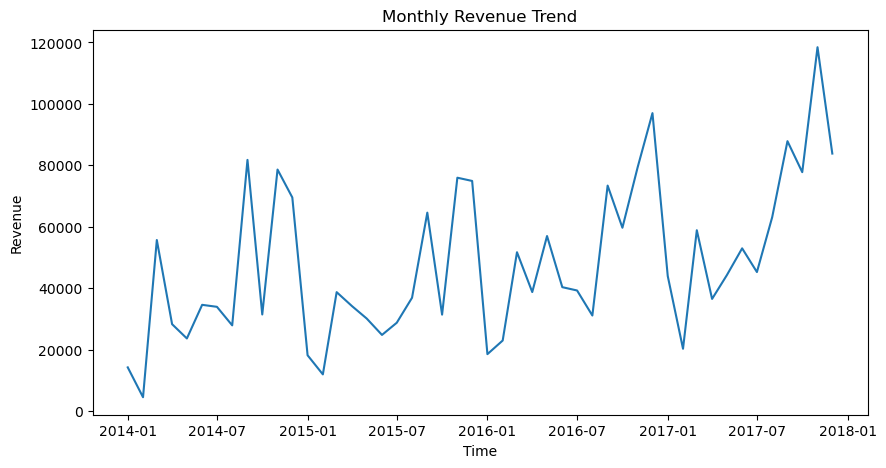

In [34]:
plt.figure(figsize=(10,5))
plt.plot(monthly_revenue['Date'], monthly_revenue['Revenue'])
plt.title("Monthly Revenue Trend")
plt.xlabel("Time")
plt.ylabel("Revenue")
plt.show()


In [35]:
yearly_revenue = df.groupby('Order_Year')['Revenue'].sum()
yoy_growth = yearly_revenue.pct_change() * 100

yoy_growth


Order_Year
2014          NaN
2015    -2.832227
2016    29.471521
2017    20.355962
Name: Revenue, dtype: float64

In [36]:
category_perf = (
    df.groupby('Category')[['Revenue', 'Profit']]
    .sum()
    .sort_values(by='Revenue', ascending=False)
)

category_perf


,Revenue,Profit
Category,,
Technology,836154.0330,145454.9481
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008


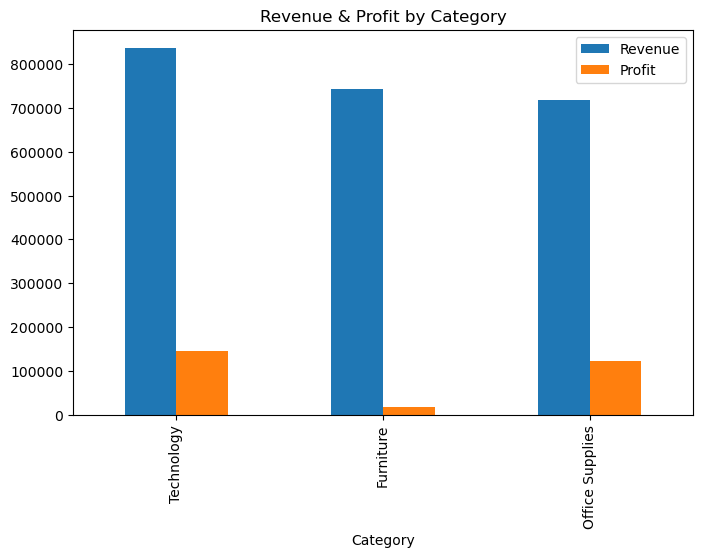

In [37]:
category_perf.plot(kind='bar', figsize=(8,5))
plt.title("Revenue & Profit by Category")
plt.show()


In [38]:
subcat_profit = (
    df.groupby('Sub-Category')['Profit']
    .sum()
    .sort_values()
)

subcat_profit.head(5)


Sub-Category
Tables      -17725.4811
Bookcases    -3472.5560
Supplies     -1189.0995
Fasteners      949.5182
Machines      3384.7569
Name: Profit, dtype: float64

In [39]:
region_perf = (
    df.groupby('Region')[['Revenue', 'Profit']]
    .sum()
    .sort_values(by='Revenue', ascending=False)
)

region_perf


,Revenue,Profit
Region,,
West,725457.8245,108418.4489
East,678781.2400,91522.7800
Central,501239.8908,39706.3625
South,391721.9050,46749.4303


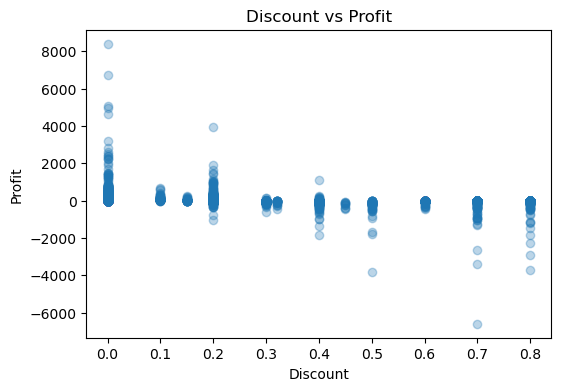

In [40]:
plt.figure(figsize=(6,4))
plt.scatter(df['Discount'], df['Profit'], alpha=0.3)
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.title("Discount vs Profit")
plt.show()


In [41]:
product_revenue = (
    df.groupby('Product Name')['Revenue']
    .sum()
    .sort_values(ascending=False)
)

cum_revenue = product_revenue.cumsum() / product_revenue.sum()

pareto = cum_revenue[cum_revenue <= 0.8]

len(pareto) / len(product_revenue) * 100


22.64864864864865

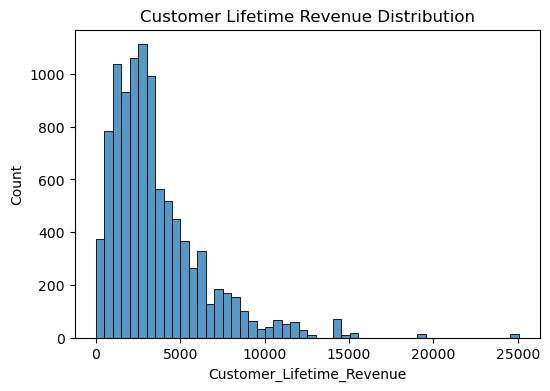

In [42]:
plt.figure(figsize=(6,4))
sns.histplot(df['Customer_Lifetime_Revenue'], bins=50)
plt.title("Customer Lifetime Revenue Distribution")
plt.show()


In [43]:
import datetime as dt

snapshot_date = df['Order Date'].max() + pd.Timedelta(days=1)


In [44]:
rfm = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (snapshot_date - x.max()).days,  # Recency
    'Order ID': 'nunique',                                   # Frequency
    'Revenue': 'sum'                                         # Monetary
}).reset_index()


In [45]:
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']
rfm.head()


,Customer ID,Recency,Frequency,Monetary
0,AA-10315,185,5,5563.560
1,AA-10375,20,9,1056.390
2,AA-10480,260,4,1790.512
3,AA-10645,56,6,5086.935
4,AB-10015,416,3,886.156


In [46]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1,2,3,4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])


In [47]:
rfm['RFM_Score'] = (
    rfm['R_Score'].astype(int) +
    rfm['F_Score'].astype(int) +
    rfm['M_Score'].astype(int)
)


In [48]:
def segment_customer(score):
    if score >= 10:
        return 'High Value'
    elif score >= 7:
        return 'Loyal'
    elif score >= 5:
        return 'At Risk'
    else:
        return 'Low Value'

rfm['Customer_Segment'] = rfm['RFM_Score'].apply(segment_customer)


In [49]:
rfm['Customer_Segment'].value_counts()


Customer_Segment
Loyal         283
At Risk       196
High Value    175
Low Value     139
Name: count, dtype: int64

In [50]:
df = df.merge(
    rfm[['Customer ID', 'Customer_Segment']],
    on='Customer ID',
    how='left'
)


In [51]:
segment_perf = (
    df.groupby('Customer_Segment')[['Revenue', 'Profit']]
    .sum()
    .sort_values(by='Revenue', ascending=False)
)

segment_perf


,Revenue,Profit
Customer_Segment,,
Loyal,974940.1784,128989.6055
High Value,851829.4969,103779.8924
At Risk,351180.5645,45824.3530
Low Value,119250.6205,7803.1708


In [52]:
df.to_csv("segmented_sales.csv", index=False)
rfm.to_csv("rfm_customers.csv", index=False)


In [53]:
monthly_ts = (
    df.groupby(pd.Grouper(key='Order Date', freq='M'))['Revenue']
    .sum()
    .reset_index()
)

monthly_ts.head()


C:\Users\Mudavath_prabhas\AppData\Local\Temp\ipykernel_1444\3288841487.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby(pd.Grouper(key='Order Date', freq='M'))['Revenue']


,Order Date,Revenue
0,2014-01-31,14236.895
1,2014-02-28,4519.892
2,2014-03-31,55691.009
3,2014-04-30,28295.345
4,2014-05-31,23648.287


In [54]:
monthly_ts.columns = ['Date', 'Revenue']


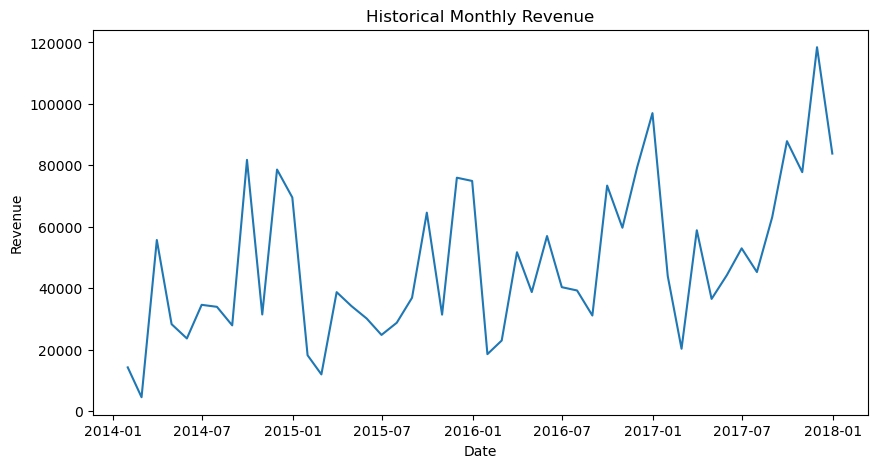

In [55]:
plt.figure(figsize=(10,5))
plt.plot(monthly_ts['Date'], monthly_ts['Revenue'])
plt.title("Historical Monthly Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()


In [56]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [57]:
model = ExponentialSmoothing(
    monthly_ts['Revenue'],
    trend='add',
    seasonal='add',
    seasonal_periods=12
)

fit_model = model.fit()


In [58]:
forecast_steps = 6
forecast = fit_model.forecast(forecast_steps)

forecast


48    49441.360760
49    41559.155085
50    74681.921105
51    61245.223933
52    68135.118792
53    65089.523263
dtype: float64

In [59]:
forecast_dates = pd.date_range(
    start=monthly_ts['Date'].max() + pd.offsets.MonthEnd(1),
    periods=forecast_steps,
    freq='M'
)


C:\Users\Mudavath_prabhas\AppData\Local\Temp\ipykernel_1444\1230081385.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(


In [60]:
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted_Revenue': forecast
})


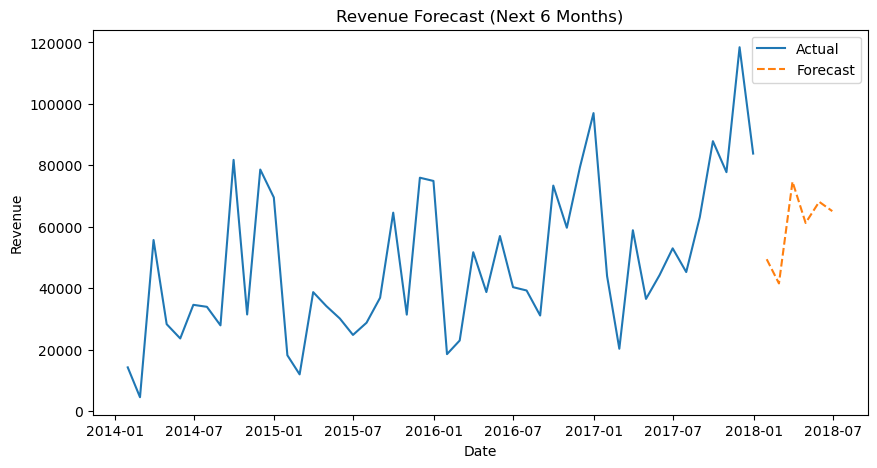

In [61]:
plt.figure(figsize=(10,5))
plt.plot(monthly_ts['Date'], monthly_ts['Revenue'], label='Actual')
plt.plot(forecast_df['Date'], forecast_df['Forecasted_Revenue'], 
         label='Forecast', linestyle='--')
plt.legend()
plt.title("Revenue Forecast (Next 6 Months)")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()


In [62]:
forecast_df.to_csv("revenue_forecast.csv", index=False)
